# ИУ5-22М Вариант 7

Доп. задание: для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.

## Задача №7
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

In [1]:
import pandas as pd
data = pd.read_csv("../23/melbourne_housing.csv.zst")

In [2]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [3]:
display(data.shape)
display(data[["Price"]].describe())

(34857, 21)

,Price
count,2.724700e+04
mean,1.050173e+06
std,6.414671e+05
min,8.500000e+04
25%,6.350000e+05
50%,8.700000e+05
75%,1.295000e+06
max,1.120000e+07


In [4]:
from sklearn.impute import SimpleImputer

data_copy = data
data_copy["Price"] = SimpleImputer(strategy = "median").fit_transform(data[["Price"]])

display(data_copy.shape)
display(data_copy[["Price"]].isnull().sum())
display(data[["Price"]].describe())

(34857, 21)

Price    0
dtype: int64

,Price
count,3.485700e+04
mean,1.010838e+06
std,5.719992e+05
min,8.500000e+04
25%,6.950000e+05
50%,8.700000e+05
75%,1.150000e+06
max,1.120000e+07


Выполнена импьютация медианным значением по столбца Price. Форма не изменилась, число нулевых значений стало 0, среднее изменилось, медиана - нет.

## Задача №27
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

In [5]:
import pandas as pd
data = pd.read_csv("../1/stroke-data.csv.zst")

In [6]:
data = data.dropna(axis=0, how='any')
display(data.shape)
display(data.columns)

(4909, 12)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data["bmi"].head(20)

0     36.6
2     32.5
3     34.4
4     24.0
5     29.0
6     27.4
7     22.8
9     24.2
10    29.7
11    36.8
12    27.3
14    28.2
15    30.9
16    37.5
17    25.8
18    37.8
20    22.4
21    48.9
22    26.6
23    32.5
Name: bmi, dtype: float64

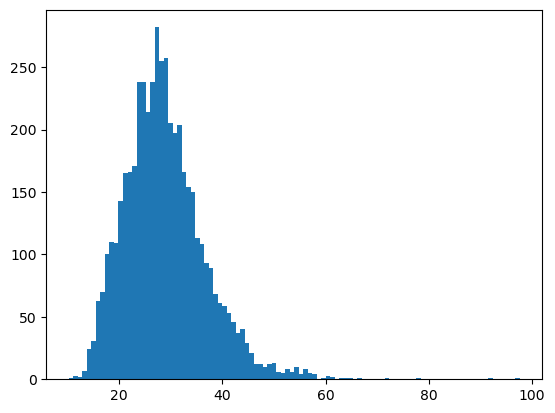

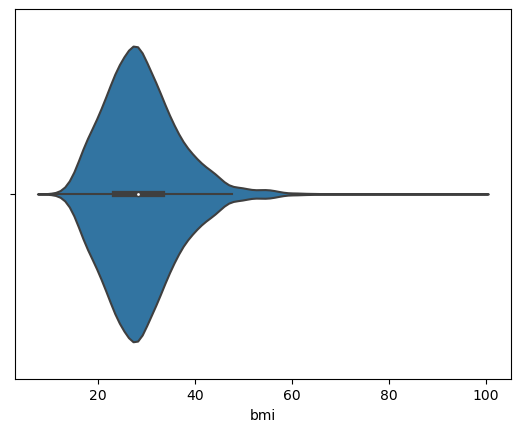

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data[["bmi"]], 100)
plt.show()

sns.violinplot(x=data["bmi"]);

На гистограмме видны выбросы в районе $60$, $\approx 70$, $\approx 80$, $\approx 95$, $\approx 98$

In [9]:
lower_boundary = data["bmi"].quantile(0.05)
upper_boundary = data["bmi"].quantile(0.95)

lower_boundary, upper_boundary

(17.64, 42.959999999999944)

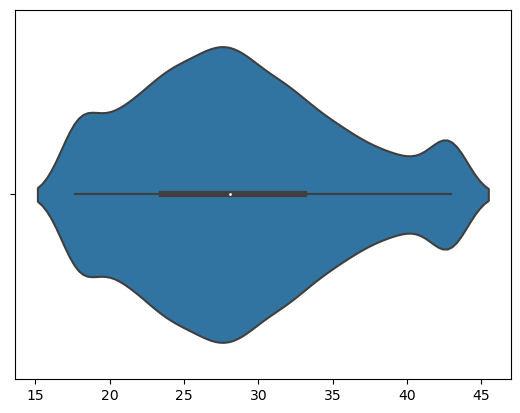

In [10]:
import numpy as np

replaced_bmi = np.where(
  data["bmi"] > upper_boundary,
  upper_boundary,
  np.where(
    data["bmi"] < lower_boundary,
    lower_boundary,
    data["bmi"],
  )
)

sns.violinplot(x = replaced_bmi);

Выбросы заменены